## Report 4

**Date:** 2024-05-28
**Author:** Piotr Szepietowski

## Python Libraries Used Further

    - math
    - matplotlib
    - pandas

## Implementation of Numerical Methods for Solving Differential Equations

Below is a description of the numerical methods used to solve ordinary differential equations (ODE):

---

### **Euler's Method**
The simplest and most intuitive numerical method. It approximates the solution through linear extrapolation of the function value based on its derivative at the starting point of the interval. Each subsequent point is determined by the formula:
$$
y_{n+1} = y_n + h \cdot f(x_n, y_n)
$$
- **Advantages:** Simple implementation, low computational requirements.
- **Disadvantages:** Low accuracy, high sensitivity to step size $h$.

---

### **Modified Euler Method (Midpoint Method)**
An improved version of Euler's method that introduces an additional correction step. First, an Euler step is performed to estimate the value at the middle of the interval, and then this value is used to determine the final increment:
$$
y_{n+1} = y_n + h \cdot f\left(x_n + \frac{h}{2},\ y_n + \frac{h}{2} f(x_n, y_n)\right)
$$
- **Advantages:** Greater accuracy than Euler's method, still simple implementation.
- **Disadvantages:** Requires additional intermediate calculation.

---

### **Heun's Method (Trapezoidal Method)**
Also known as the predictor-corrector method. Uses the average slope value at the beginning and end of the interval:
$$
y_{n+1} = y_n + \frac{h}{2} \left[ f(x_n, y_n) + f(x_{n+1}, y_n + h f(x_n, y_n)) \right]
$$
- **Advantages:** Even greater accuracy, better numerical stability.
- **Disadvantages:** Requires two function $f$ evaluations per step.

---

### **Runge-Kutta Method (RK4)**
An advanced fourth-order method that uses four different slope approximations in a single iteration step:
$$
\begin{align*}
k_1 &= f(x_n, y_n) \\
k_2 &= f\left(x_n + \frac{h}{2},\ y_n + \frac{h}{2} k_1\right) \\
k_3 &= f\left(x_n + \frac{h}{2},\ y_n + \frac{h}{2} k_2\right) \\
k_4 &= f(x_n + h,\ y_n + h k_3) \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$
- **Advantages:** Very high accuracy, widely used in practice.
- **Disadvantages:** Greater computational complexity (four function $f$ evaluations per step).

---

Each of these methods has its applications depending on the required accuracy and available computational resources. In practice, for simple problems and large steps, Euler's method may be sufficient, while for greater precision, higher-order methods such as Runge-Kutta are recommended.

In [8]:
f = lambda x,y: x + y; 
def euler(x, y, h, target):
    while x < target:
        y += h * f(x, y)
        x += h
    return (x, y)

def modifiedEuler(x, y, h, target):
    while x < target:
        y += h * f(x + 0.5*h, y +0.5*h*f(x,y))
        x += h
    return (x,y)

def heun(x, y, h, target):
    while x < target:
        y += 0.5 * h * (f(x, y) + f(x + h, y + h * f(x, y)))
        x += h
    return (x, y)

def rungyKatt(x, y, h, target):
    while x < target:
        k1 = f(x, y)
        k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6*(k1 + 2 * k2 + 2 * k3 + k4)
        x += h
    return (x, y)

print(euler(0, 1, 0.1, 0.1))
print(modifiedEuler(0, 1, 0.1, 0.1))
print(heun(0,1,0.1, 0.1))
print(rungyKatt(0,1,0.1, 0.1))

(0.1, 1.1)
(0.1, 1.11)
(0.1, 1.11)
(0.1, 1.1103416666666666)


## Initial Conditions and Calculation Range
The aim of the project is to determine and analyze the maximum numerical error for different methods of solving a differential equation defined by the formula:
$$y' = f(x, y) = \frac{4x}{(1 + x^2)^{1/3}}$$
The comparison will be made with respect to the analytical solution expressed by the function: $g(t) = 3(1 + x^2)^{2/3} - 2.772$

   - Solutions should be calculated in the range $[-2, 2]$.
   - The initial condition is $y(-2) = 6$.
   - Integration steps: $h = 0.5, 0.1, 0.01$.

## Graphical Presentation of Method Results

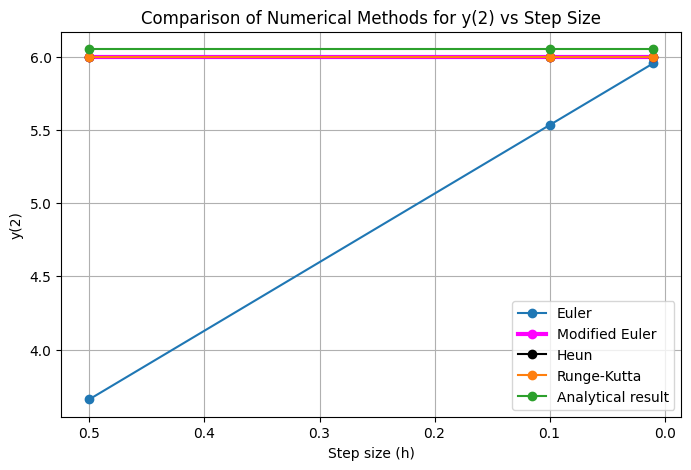

In [9]:
import pandas as pd
import math as m
f = lambda x, y: 4 * x / m.pow(1 + m.pow(x, 2), 1 / 3)

hArr = [0.5, 0.1, 0.01]
analitic = lambda x: 3 * (1 + x ** 2) ** (2/3) - 2.722
x0, y0, x1 = -2, 6, 2
results = {"euler": [], "modified": [], "katt": [], "heun": [], "analytic": []}
errors = {"euler": [], "modified": [], "katt": [], "heun": [], "analytic": []}
for h in hArr:
    results["euler"].append(euler(x0, y0, h, x1)[1])
    results["modified"].append(modifiedEuler(x0, y0, h, x1)[1])
    results["heun"].append(heun(x0, y0, h, x1)[1])
    results["katt"].append(rungyKatt(x0, y0, h, x1)[1])
    results["analytic"].append(analitic(x1))

    errors["euler"].append(euler(x0, y0, h, x1)[1] - analitic(x1))
    errors["modified"].append(modifiedEuler(x0, y0, h, x1)[1] - analitic(x1))
    errors["heun"].append(heun(x0, y0, h, x1)[1] - analitic(x1))
    errors["katt"].append(rungyKatt(x0, y0, h, x1)[1] - analitic(x1))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(hArr, results["euler"], marker='o', label='Euler')
plt.plot(hArr, results["modified"], marker='o', label='Modified Euler', linewidth=3, color='magenta')
plt.plot(hArr, results["heun"], marker='o', label="Heun", color="black")
plt.plot(hArr, results["katt"], marker='o', label="Runge-Kutta")
plt.plot(hArr, results["analytic"], marker='o', label="Analytical result")

plt.xlabel('Step size (h)')
plt.ylabel('y(2)')
plt.title('Comparison of Numerical Methods for y(2) vs Step Size')
plt.legend()
plt.gca().invert_xaxis()  # Optional: to show decreasing h left-to-right
plt.grid(True)
plt.show()

## Tabular Presentation of Method Results

In [10]:
df_results = pd.DataFrame({
    'h': hArr,
    'Euler': results['euler'],
    'Euler error': errors['euler'],
    'Modified Euler': results['modified'],
    'Modified Euler error': errors['modified'],
    'Heun': results['heun'],
    'Heun error': errors['heun'],
    'Runge-Kutta': results['katt'],
    'Runge-Kutta error': errors['katt'],
    'Analytical': results['analytic']
})
df_results

,h,Euler,Euler error,Modified Euler,Modified Euler error,Heun,Heun error,Runge-Kutta,Runge-Kutta error,Analytical
0,0.50,3.660786,-2.389267,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053
1,0.10,5.532157,-0.517896,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053
2,0.01,5.953216,-0.096837,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053


## Creating a Chart Showing Intermediate Values Calculated During the Function Value Determination Depending on the Step

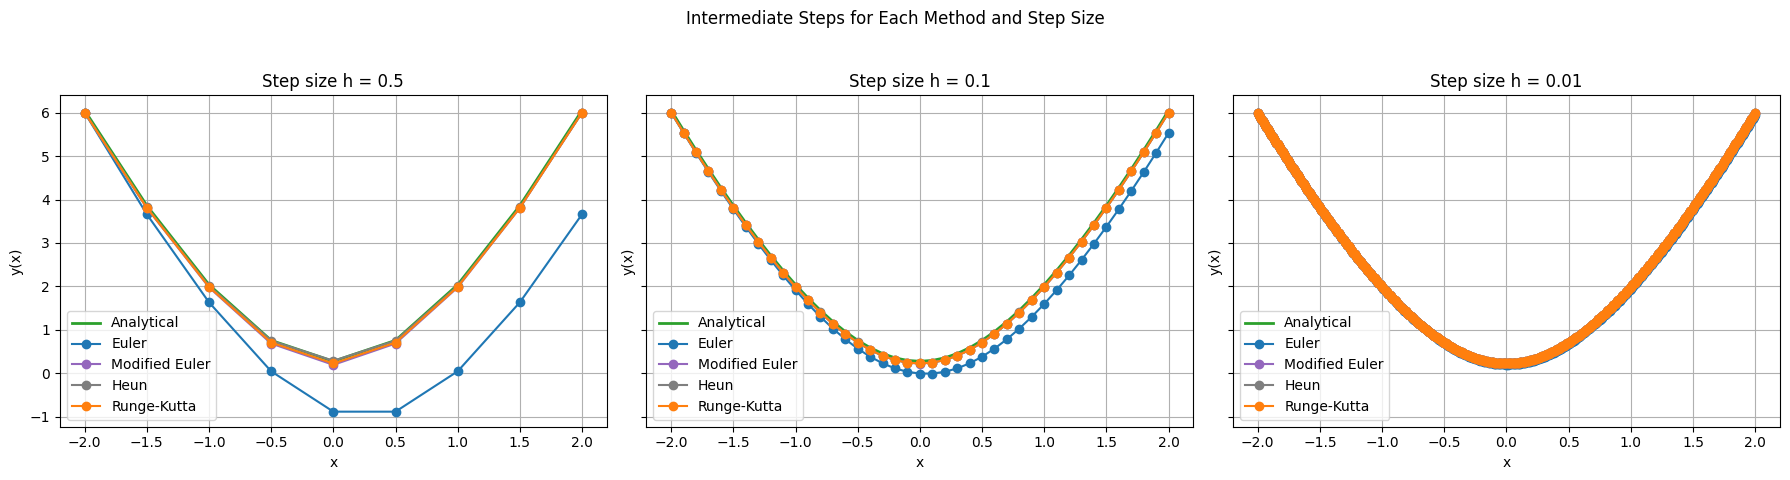

In [11]:
def euler_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += h * f(x, y)
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def modifiedEuler_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += h * f(x + 0.5*h, y + 0.5*h*f(x, y))
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def heun_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += 0.5 * h * (f(x, y) + f(x + h, y + h * f(x, y)))
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def rungyKatt_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        k1 = f(x, y)
        k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6*(k1 + 2 * k2 + 2 * k3 + k4)
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def analytic_points(x0, x1, h):
    xs = []
    ys = []
    x = x0
    while x <= x1 + 1e-10:
        xs.append(x)
        ys.append(3 * (1 + x ** 2) ** (2/3) - 2.722)
        x += h
    return xs, ys

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
h_labels = [str(h) for h in hArr]
methods = [
    ('Euler', euler_points, 'tab:blue'),
    ('Modified Euler', modifiedEuler_points, 'tab:purple'),
    ('Heun', heun_points, 'tab:gray'),
    ('Runge-Kutta', rungyKatt_points, 'tab:orange'),
]

for idx, (h, label) in enumerate(zip(hArr, h_labels)):
    # Plot analytical solution
    xs_analytic, ys_analytic = analytic_points(x0, x1, h)
    axs[idx].plot(xs_analytic, ys_analytic, label='Analytical', color='tab:green', linewidth=2)
    # Plot each method
    for name, func, color in methods:
        xs, ys = func(x0, y0, h, x1)
        axs[idx].plot(xs, ys, marker='o', label=name, color=color)
    axs[idx].set_title(f"Step size h = {label}")
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('y(x)')
    axs[idx].grid(True)
    axs[idx].legend()

plt.suptitle('Intermediate Steps for Each Method and Step Size')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Results Analysis
### Conclusions from Numerical Analysis

- **Method Accuracy:**
    - Even for the largest step, all methods except Euler's are very accurate.
    - As the integration step ($h$) decreases, the charts for the Modified Euler, Heun, and Runge-Kutta methods practically overlap with the analytical solution.
    - For the smallest step, the differences are negligible.

- **Euler's Method:**
    - It is the fastest but shows the largest error, especially with larger steps.
    - Decreasing $h$ improves the accuracy of this method, as shown by the decreasing error.

- **Higher-Order Methods:**
    - Modified Euler, Heun, and Runge-Kutta provide very high accuracy even with larger steps.
    - The differences between them are minimal and practically unnoticeable for small $h$.

- **Recommendations:**
    - The choice of method should depend on the required accuracy and available computational resources.
    - For high precision, higher-order methods are recommended.
    - For quick, approximate calculations, Euler's method with a small step can be considered.

**Summary:**  
Higher-order methods are definitely more effective for the differential equation under consideration, providing high accuracy even with larger steps. Euler's method can be used for quick calculations, but only with an appropriately small step.

## Creating an Error Chart Relative to the Analytical Function

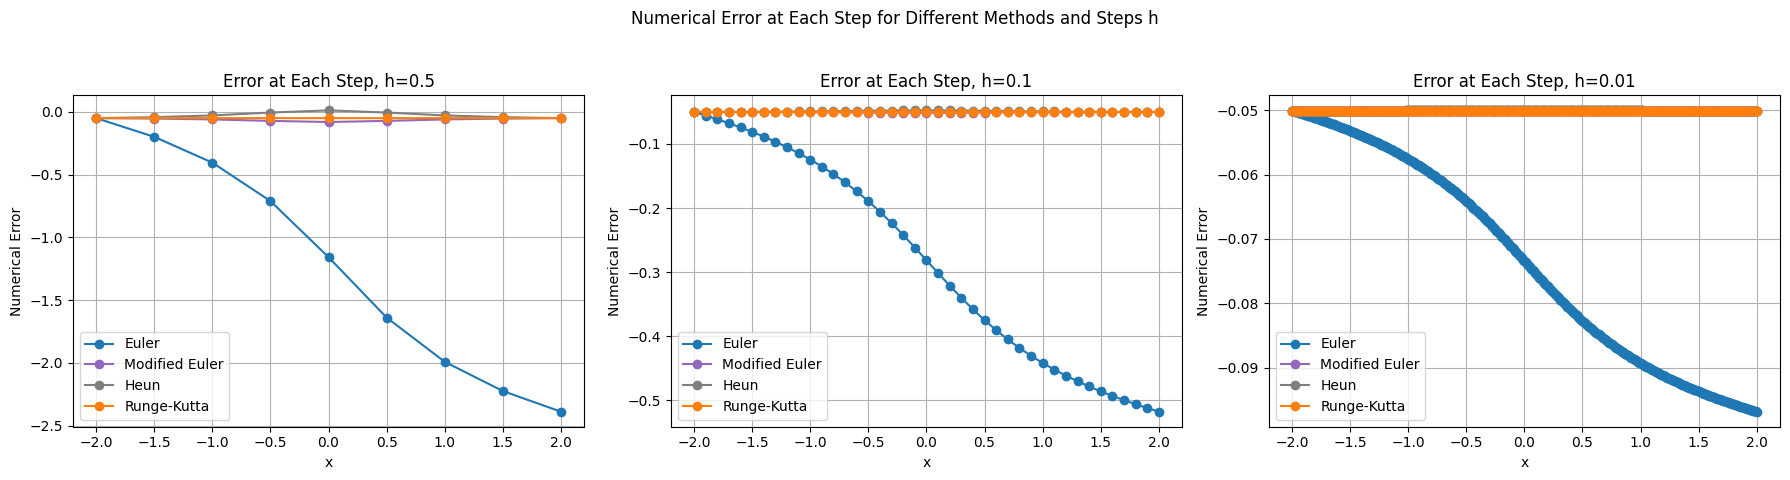

In [12]:
plt.figure(figsize=(18, 5))
for idx, h in enumerate(hArr):
    plt.subplot(1, 3, idx+1)
    xs_analytic, ys_analytic = analytic_points(x0, x1, h)
    for name, func, color in [
        ('Euler', euler_points, 'tab:blue'),
        ('Modified Euler', modifiedEuler_points, 'tab:purple'),
        ('Heun', heun_points, 'tab:gray'),
        ('Runge-Kutta', rungyKatt_points, 'tab:orange'),
    ]:
        xs, ys = func(x0, y0, h, x1)
        # Calculate error relative to analytical solution
        errors = [y - (3 * (1 + x ** 2) ** (2/3) - 2.722) for x, y in zip(xs, ys)]
        plt.plot(xs, errors, marker='o', label=name, color=color)
    plt.title(f'Error at Each Step, h={h}')
    plt.xlabel('x')
    plt.ylabel('Numerical Error')
    plt.grid(True)
    plt.legend()
plt.suptitle('Numerical Error at Each Step for Different Methods and Steps h')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

With the largest step, errors are quite noticeable in the middle of the range, but they quickly disappear with smaller steps.

**Conclusions from the Error Chart:**

- **The largest error** appears for Euler's method with the largest step ($h=0.5$), especially in the middle of the range.
- **Decreasing the step** ($h=0.1$, $h=0.01$) causes the error to rapidly decrease for all methods, and the error charts become almost flat and close to zero.
- **Higher-order methods** (Modified Euler, Heun, Runge-Kutta) already give very small errors for $h=0.5$, and for smaller steps, the error is practically unnoticeable.
- **Practical Conclusions:**  
    - For high accuracy, it is sufficient to use any of the higher-order methods with a moderately small step.
    - Euler's method requires a very small step to achieve comparable accuracy.
    - In practice, the choice of method and step should be a compromise between accuracy requirements and computation time.

## Comparison of Time Performance of Methods

In [13]:
import time

# Functions to measure execution time of each method
def time_method(method, x, y, h, target):
    start = time.perf_counter()
    method(x, y, h, target)
    end = time.perf_counter()
    return end - start

timings = {
    'h': [],
    'Euler': [],
    'Modified Euler': [],
    'Heun': [],
    'Runge-Kutta': []
}

for h_val in hArr:
    timings['h'].append(h_val)
    timings['Euler'].append(time_method(euler, x0, y0, h_val, x1))
    timings['Modified Euler'].append(time_method(modifiedEuler, x0, y0, h_val, x1))
    timings['Heun'].append(time_method(heun, x0, y0, h_val, x1))
    timings['Runge-Kutta'].append(time_method(rungyKatt, x0, y0, h_val, x1))

df_timings = pd.DataFrame(timings)
df_timings

,h,Euler,Modified Euler,Heun,Runge-Kutta
0,0.50,0.000036,0.000018,0.000022,0.000028
1,0.10,0.000033,0.000103,0.000092,0.000148
2,0.01,0.000352,0.000700,0.001262,0.001369


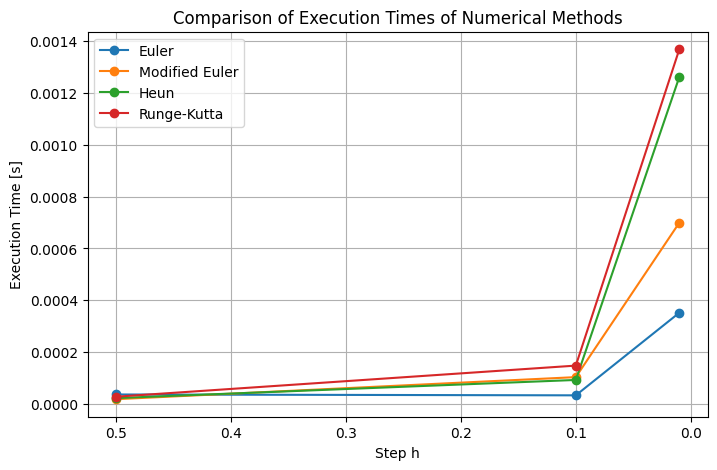

In [14]:
plt.figure(figsize=(8, 5))
methods = ['Euler', 'Modified Euler', 'Heun', 'Runge-Kutta']
for method in methods:
    plt.plot(df_timings['h'], df_timings[method], marker='o', label=method)
plt.xlabel('Step h')
plt.ylabel('Execution Time [s]')
plt.title('Comparison of Execution Times of Numerical Methods')
plt.legend()
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

For each function, the execution time increases inversely proportional to the step size. The least accurate Euler's method is clearly the fastest, followed by its much more accurate modified version. In each case, the Runge-Kutta method is the slowest.
**Summary:**
- The smaller the step, the longer the computation time for each method.
- Euler is the fastest but the least accurate.
- Runge-Kutta is the slowest but provides the highest accuracy.

## Method Recommendation
**Summary of Recommendations for Choosing a Numerical Method:**

- **For most cases** (except Euler), the results are almost identical, and the error differences are negligible with small steps.
- **The Modified Euler Method** is the fastest among accurate methods and recommended for short ranges and when we need quick results while maintaining high precision.
- **Heun's Method** works better for longer ranges, as it provides even greater stability and accuracy, albeit at the cost of slightly longer computation time.
- **Euler's Method** is the most time-efficient, but its accuracy is significantly lower – it can only be used where speed is crucial, and precision is of secondary importance.
- **The Runge-Kutta Method (RK4)** is the slowest but provides the highest accuracy – recommended when calculation accuracy is a priority.

**General Recommendation:**  
In practice, if we are concerned with a compromise between speed and accuracy, it is worth choosing the Modified Euler or Heun's method. We use the Runge-Kutta method when maximum precision is key, and Euler's method when only the speed of calculations matters.